In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
eco = pd.read_csv("EcommerceCustomers.csv")

In [24]:
eco.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Show features of Dataset

In [25]:
eco.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Top 10 Customers who spent the most yearly amount spent

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Email'>

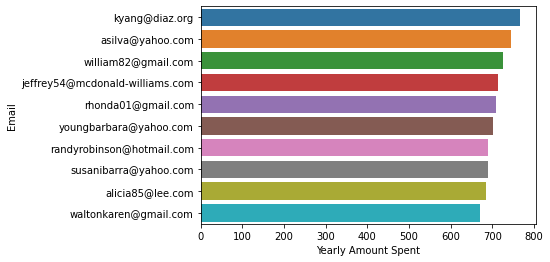

In [41]:
TopCustomer = eco[['Email', 'Yearly Amount Spent']].set_index('Yearly Amount Spent')\
    .sort_values('Yearly Amount Spent',ascending=False).head(10)
sns.barplot(x=TopCustomer.index, y=TopCustomer['Email'])

Compare yearly amount spent against different variables

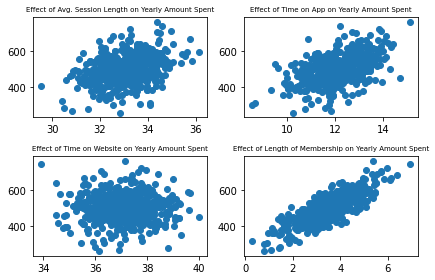

In [26]:
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.title(f"Effect of {eco.columns[i+2]} on {eco.columns[-1]}", fontsize=7)
    plt.scatter(eco.iloc[:, i+2], eco.iloc[:, -1])
plt.tight_layout()

Sample Correlation

<AxesSubplot:>

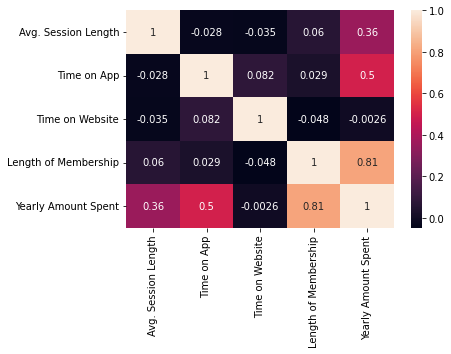

In [39]:
sns.heatmap(eco.corr(), annot=True)

It shows "Length of MemberShip" has the strongest connection with yearly amount spent. "Time spent on app" and "Average session length" has positive effect on yearly amount spent. However, "Time on website" has no connection with avg session length